In [29]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import stat
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings("ignore")

# sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S&P_500_companies')[0]

# sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')

# symbols_list = sp500['Symbol'].unique().tolist()

# symbols_list

# end_date = '2023-09-27'

# start_date = pd.to_datetime(end_date) - pd.DateOffset(years=8)

# df = yf.download(tickers=symbols_list, start=start_date, end=end_date).stack()

# df.index.anmes = ['Date', 'Ticker']

# df.columns = df.columns.str.lower()

df

Price               adj close       close        high         low        open  \
Date       Ticker                                                               
2015-09-28 A        31.622189   33.369999   34.270000   33.320000   34.130001   
           AAL      37.266270   39.080002   40.180000   38.639999   39.869999   
           AAPL     25.849510   28.110001   28.642500   28.110001   28.462500   
           ABBV     38.820049   52.500000   55.430000   52.340000   55.389999   
           ABT      34.549812   39.060001   40.740002   39.000000   40.740002   
...                       ...         ...         ...         ...         ...   
2023-09-26 XYL      89.519997   89.519997   90.849998   89.500000   90.379997   
           YUM     124.010002  124.010002  124.739998  123.449997  124.239998   
           ZBH     112.459999  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZTS     176.869995  176.869995  178.449997  176.270004  176.580002   

Price                   volume  garman_klass_vol  
Date       Ticker                                 
2015-09-28 A         2615400.0         -1.140265  
           AAL       9635900.0         -1.221755  
           AAPL    208436000.0         -1.036451  
           ABBV     15123000.0         -1.204586  
           ABT      17219300.0         -1.171552  
...                        ...               ...  
2023-09-26 XYL       1322400.0         -1.636806  
           YUM       1500600.0         -1.781808  
           ZBH       3610500.0         -1.736558  
           ZBRA       355400.0         -2.035931  
           ZTS       1463200.0         -1.935767  

[986432 rows x 7 columns]

## Garman-Klass Volatility Estimator

The Garman-Klass volatility estimator is calculated using the following formula:

\[
\sigma_{GK} = \sqrt{\frac{1}{2} \log\left(\frac{High}{Low}\right)^2 - (2\log(2) - 1) \cdot \log\left(\frac{Close}{Open}\right)^2}
\]

Where:
- \( High \) = The highest price of the asset during the period.
- \( Low \) = The lowest price of the asset during the period.
- \( Open \) = The opening price of the asset during the period.
- \( Close \) = The closing price of the asset during the period.


<Axes: xlabel='Date'>

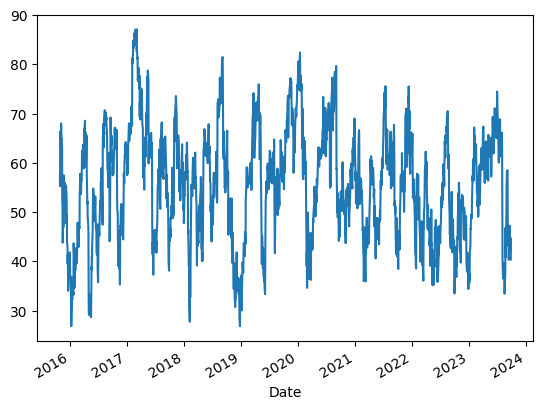

In [32]:
df['garman_klass_vol'] = np.sqrt((0.5 * np.log(df['high'] / df['low']) ** 2) - (2 * np.log(2) - 1) * (np.log(df['adj close'] / df['open']) ** 2))

df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

df.xs('AAPL', level=1)['rsi'].plot()